#Part 5_Ch04_De novo 분자설계

SEIHWAN 2025

# 1. 필요한 패키지 설치


In [ ]:
# ===================================================================
# GPCR 표적 신약 설계 프로젝트 - 환경 설정 및 디렉토리 구성 (Colab용)
# ===================================================================

# 필요한 패키지 설치
!pip -q install numpy pandas matplotlib seaborn rdkit scikit-learn requests biopython py3Dmol torch tqdm chembl_webresource_client selfies

# 필요한 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def setup_directories():
    """작업 디렉토리 구조 설정"""
    base_dir = os.path.join(os.getcwd(), "gpcr_drug_design")
    dirs = [
        base_dir,
        os.path.join(base_dir, "structures"),
        os.path.join(base_dir, "data"),
        os.path.join(base_dir, "models"),
        os.path.join(base_dir, "results"),
        os.path.join(base_dir, "visualizations")
    ]

    for dir_path in dirs:
        os.makedirs(dir_path, exist_ok=True)
        print(f"디렉토리 생성: {dir_path}")

    return base_dir

# 메인 실행 코드
if __name__ == "__main__":
    # 디렉토리 설정 실행
    base_dir = setup_directories()
    print(f"기본 작업 디렉토리: {base_dir}")
    print("환경 설정 완료")

    # 생성된 폴더 확인
    print("\n생성된 폴더 구조 확인:")
    for root, dirs, files in os.walk(base_dir):
        level = root.replace(base_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.9 MB/s eta 0:00:00
디렉토리 생성: /content/gpcr_drug_design
디렉토리 생성: /content/gpcr_drug_design/structures
디렉토리 생성: /content/gpcr_drug_design/data
디렉토리 생성: /content/gpcr_drug_design/models
디렉토리 생성: /content/gpcr_drug_design/results
디렉토리 생성: /content/gpcr_drug_design/visualizations
기본 작업 디렉토리: /content/gpcr_drug_design
환경 설정 완료

생성된 폴더 구조 확인:
gpcr_drug_design/
    structures/
    visualizatio

#2. GPCR 구조 다운로드 및 시각화

In [ ]:
# ===================================================================
# GPCR 표적 신약 설계 프로젝트 - Py3Dmol을 이용한 GPCR 구조 3D 시각화
# ===================================================================

import os
from Bio.PDB import PDBParser, PDBList
import numpy as np
import json
import py3Dmol
from IPython.display import display

def download_gpcr_structures(pdb_ids, save_dir):
    """PDB에서 GPCR 구조를 다운로드"""
    pdbl = PDBList()
    downloaded_files = []

    for pdb_id in pdb_ids:
        filename = pdbl.retrieve_pdb_file(pdb_id, pdir=save_dir, file_format="pdb")
        downloaded_files.append(filename)
        print(f"다운로드 완료: {pdb_id} -> {filename}")

    return downloaded_files

def visualize_with_py3dmol(pdb_file):
    """Py3Dmol을 사용한 인터랙티브 3D 시각화"""
    # PDB 파일 읽기
    with open(pdb_file, 'r') as f:
        pdb_data = f.read()

    # PDB ID 추출
    pdb_id = os.path.basename(pdb_file).split('.')[0]

    # Py3Dmol 뷰어 생성
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    # 스타일 설정 - 단백질
    view.setStyle({'chain': 'A'}, {'cartoon': {'color': 'spectrum'}})

    # 리간드 강조 - 헤테로 원자(HET) 식별
    view.setStyle({'hetflag': True},
                  {'stick': {'colorscheme': 'greenCarbon', 'radius': 0.3}})

    # 결합 포켓 강조 - 리간드 주변 5Å 이내의 잔기
    view.addStyle({'within': {'distance': 5.0, 'sel': {'hetflag': True}}},
                 {'stick': {'colorscheme': 'cyanCarbon', 'radius': 0.2}})

    # 표면 추가 (반투명)
    view.addSurface(py3Dmol.VDW, {'opacity': 0.7, 'color': 'white'})

    # 카메라 위치 조정
    view.zoomTo()

    # 뷰어 표시
    print(f"GPCR 구조 시각화: {pdb_id}")
    display(view)

    return view

def analyze_binding_pocket(pdb_file):
    """GPCR 결합 포켓 분석"""
    try:
        parser = PDBParser(QUIET=True)
        structure = parser.get_structure('GPCR', pdb_file)
        pdb_id = os.path.basename(pdb_file).split('.')[0]

        # 첫 번째 모델 추출
        model = structure[0]

        # 리간드 찾기 (HET 원자)
        ligand_atoms = []
        ligand_residues = set()

        for chain in model:
            for residue in chain:
                if residue.id[0] != ' ':  # HET 원자 식별
                    ligand_residues.add((chain.id, residue.id))
                    for atom in residue:
                        ligand_atoms.append(atom)

        if not ligand_atoms:
            print(f"경고: {pdb_file}에서 리간드를 찾을 수 없습니다.")
            return None

        # 포켓 분석: 리간드 주변 5Å 이내의 잔기 찾기
        pocket_residues = set()
        for chain in model:
            for residue in chain:
                if residue.id[0] == ' ':  # 표준 아미노산 잔기
                    for atom in residue:
                        for lig_atom in ligand_atoms:
                            dist = atom - lig_atom
                            if dist < 5.0:  # 5Å 이내
                                pocket_residues.add((chain.id, residue.id[1], residue.resname))
                                break

        # 결과 출력
        print(f"결합 포켓 분석 결과 ({pdb_id}):")
        print(f"  - 리간드 원자 수: {len(ligand_atoms)}")
        print(f"  - 결합 포켓 잔기 수: {len(pocket_residues)}")

        # 결합 포켓 잔기 정보
        print("\n결합 포켓 주요 잔기:")
        pocket_list = sorted(list(pocket_residues), key=lambda x: (x[0], x[1]))
        for i, residue in enumerate(pocket_list[:10]):  # 처음 10개만 표시
            print(f"  {i+1}. Chain {residue[0]}, {residue[2]} {residue[1]}")
        if len(pocket_list) > 10:
            print(f"  ... 외 {len(pocket_list) - 10}개 잔기")

        # 포켓 정보 반환
        pocket_info = {
            'pdb_id': pdb_id,
            'ligand_atoms': len(ligand_atoms),
            'pocket_residues': len(pocket_residues),
            'pocket_residues_list': [{'chain': r[0], 'residue_id': r[1], 'residue_name': r[2]}
                                     for r in pocket_residues]
        }

        return pocket_info

    except Exception as e:
        print(f"포켓 분석 중 오류 발생: {str(e)}")
        return None

def visualize_binding_pocket(pdb_file):
    """결합 포켓에 초점을 맞춘 Py3Dmol 시각화"""
    # PDB 파일 읽기
    with open(pdb_file, 'r') as f:
        pdb_data = f.read()

    # PDB ID 추출
    pdb_id = os.path.basename(pdb_file).split('.')[0]

    # 결합 포켓 분석
    pocket_info = analyze_binding_pocket(pdb_file)
    if not pocket_info:
        return None

    # Py3Dmol 뷰어 생성
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    # 단백질 전체를 투명하게 표시
    view.setStyle({'protein': True},
                  {'cartoon': {'color': 'gray', 'opacity': 0.5}})

    # 리간드 강조
    view.setStyle({'hetflag': True},
                  {'stick': {'colorscheme': 'greenCarbon', 'radius': 0.3}})

    # 결합 포켓 잔기 강조
    # 결합 포켓 잔기들의 선택자 생성
    for residue in pocket_info['pocket_residues_list']:
        chain = residue['chain']
        resid = residue['residue_id']

        # 결합 포켓 잔기 스타일 설정
        view.addStyle({'chain': chain, 'resi': resid},
                     {'stick': {'colorscheme': 'cyanCarbon', 'radius': 0.2}})

    # 결합 포켓 주변만 표면 추가 (반투명)
    view.addSurface(py3Dmol.VDW,
                   {'opacity': 0.7,
                    'color': 'white',
                    'within': {'distance': 8.0, 'sel': {'hetflag': True}}})

    # 카메라 위치 조정 - 리간드에 초점
    view.zoomTo({'hetflag': True})

    # 뷰어 표시
    print(f"GPCR 결합 포켓 시각화: {pdb_id}")
    display(view)

    return view

# 인터랙티브 시각화를 위한 함수
def interactive_view_gpcr_structures():
    """노트북 환경에서 GPCR 구조 인터랙티브 시각화 및 분석"""
    # 작업 디렉토리 설정
    base_dir = os.path.join(os.getcwd(), "gpcr_drug_design")
    structures_dir = os.path.join(base_dir, "structures")
    data_dir = os.path.join(base_dir, "data")

    # 디렉토리가 없으면 생성
    for dir_path in [base_dir, structures_dir, data_dir]:
        os.makedirs(dir_path, exist_ok=True)

    # 대표적인 GPCR PDB IDs
    gpcr_pdb_ids = ['2RH1'] # 필요시 아래와 같이 여러개 입력 가능
    #gpcr_pdb_ids = ['2RH1', '3PBL', '4DKL']

    # 구조 다운로드
    downloaded_files = download_gpcr_structures(gpcr_pdb_ids, structures_dir)

    # 결과 저장을 위한 리스트
    pocket_info_list = []

    # 각 구조에 대한 시각화 및 분석
    for pdb_file in downloaded_files:
        print("\n" + "="*50)
        print(f"GPCR 구조 분석: {os.path.basename(pdb_file)}")
        print("="*50 + "\n")

        # 전체 구조 시각화
        visualize_with_py3dmol(pdb_file)

        print("\n" + "-"*30 + "\n")

        # 결합 포켓 시각화 및 분석
        pocket_info = analyze_binding_pocket(pdb_file)
        if pocket_info:
            pocket_info_list.append(pocket_info)
            visualize_binding_pocket(pdb_file)

    # 결과 저장
    if pocket_info_list:
        with open(os.path.join(data_dir, "binding_pocket_analysis.json"), 'w') as f:
            json.dump(pocket_info_list, f, indent=2)
        print("\n결합 포켓 분석 정보가 저장되었습니다.")

    print("\nGPCR 구조 다운로드 및 분석이 완료되었습니다.")

# 노트북 환경에서 실행
if __name__ == "__main__":
    interactive_view_gpcr_structures()

다운로드 완료: 2RH1 -> /content/gpcr_drug_design/structures/pdb2rh1.ent

GPCR 구조 분석: pdb2rh1.ent

GPCR 구조 시각화: pdb2rh1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


------------------------------

결합 포켓 분석 결과 (pdb2rh1):
  - 리간드 원자 수: 261
  - 결합 포켓 잔기 수: 244

결합 포켓 주요 잔기:
  1. Chain A, VAL 44
  2. Chain A, LEU 45
  3. Chain A, ALA 46
  4. Chain A, ILE 47
  5. Chain A, VAL 48
  6. Chain A, PHE 49
  7. Chain A, GLY 50
  8. Chain A, ASN 51
  9. Chain A, VAL 52
  10. Chain A, LEU 53
  ... 외 234개 잔기
결합 포켓 분석 결과 (pdb2rh1):
  - 리간드 원자 수: 261
  - 결합 포켓 잔기 수: 244

결합 포켓 주요 잔기:
  1. Chain A, VAL 44
  2. Chain A, LEU 45
  3. Chain A, ALA 46
  4. Chain A, ILE 47
  5. Chain A, VAL 48
  6. Chain A, PHE 49
  7. Chain A, GLY 50
  8. Chain A, ASN 51
  9. Chain A, VAL 52
  10. Chain A, LEU 53
  ... 외 234개 잔기
GPCR 결합 포켓 시각화: pdb2rh1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


결합 포켓 분석 정보가 저장되었습니다.

GPCR 구조 다운로드 및 분석이 완료되었습니다.


#3. ChEMBL 데이터베이스에서 GPCR 화합물 데이터 수집

수집할 GPCR 타겟 목록:
  - Adenosine A2a receptor: CHEMBL251
  - Beta-2 adrenergic receptor: CHEMBL210


GPCR 타겟 데이터 수집:  50%|█████     | 1/2 [00:02<00:02,  2.43s/it]

타겟 Adenosine A2a receptor (CHEMBL251)에서 500 개의 활성 화합물 수집


GPCR 타겟 데이터 수집: 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

타겟 Beta-2 adrenergic receptor (CHEMBL210)에서 500 개의 활성 화합물 수집


분자 데이터 전처리 중... (수정된 핑거프린트 변환 사용)


분자 처리: 100%|██████████| 1000/1000 [00:01<00:00, 762.61it/s]


전처리 완료: 1000 분자
데이터셋 분석 중...


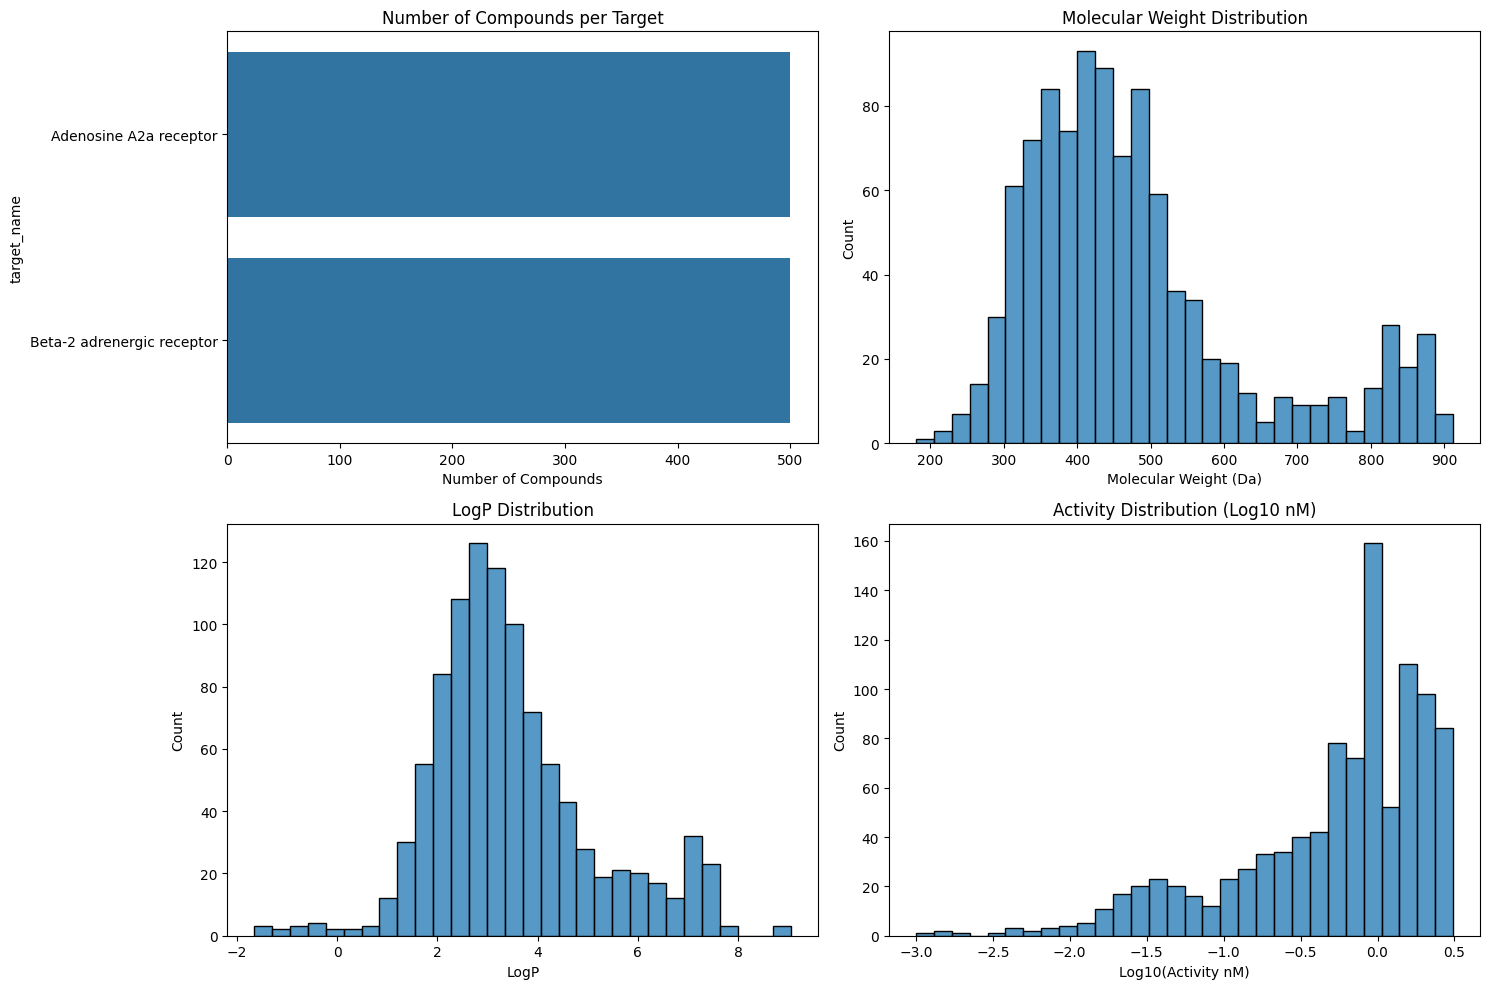


그래프 설명:
1. 타겟별 화합물 수: 각 GPCR 타겟에 대한 화합물의 분포를 보여줍니다.
2. 분자량 분포: 데이터셋의 모든 화합물에 대한 분자량 범위를 표시합니다.
3. LogP 분포: 계산된 LogP 값의 분포를 보여주며, 이는 화합물의 지용성을 나타냅니다.
4. 활성 분포: 생물학적 활성 값(log10 nM 단위)의 분포를 보여줍니다.

타겟별 대표 화합물 구조:

## Adenosine A2a receptor 타겟 대표 화합물:


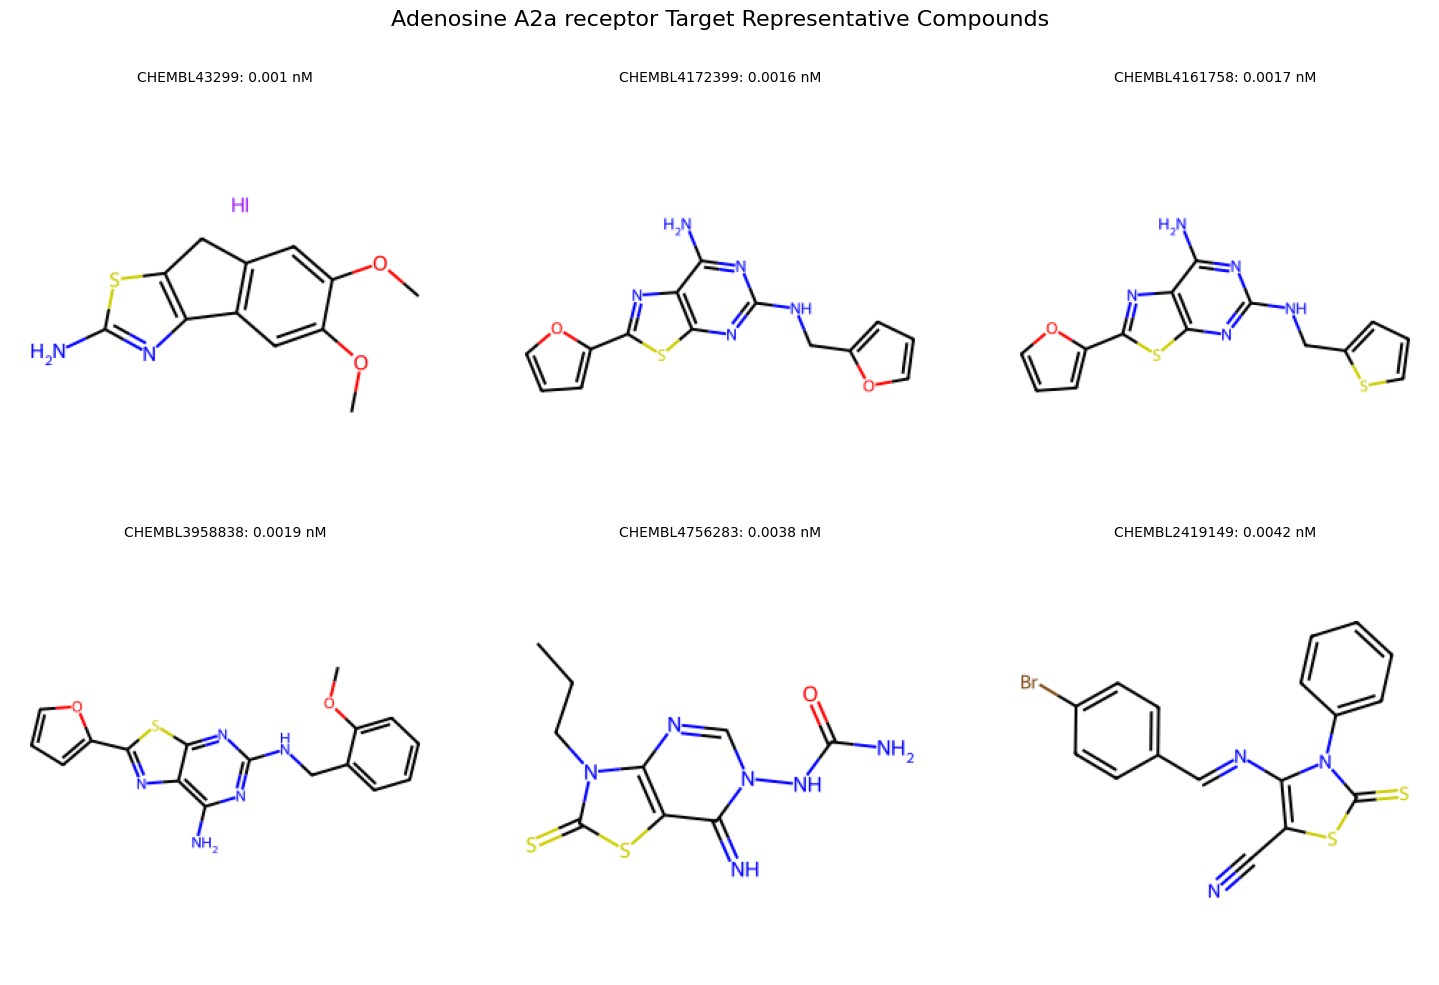


Adenosine A2a receptor 화합물 구조 설명:
위 시각화는 이 타겟과 상호작용하는 대표적인 화합물들의 2D 구조를 보여줍니다.
각 구조는 분자의 원자, 결합 및 활성에 기여하는 작용기를 표시합니다.
라벨은 각 화합물의 ChEMBL ID와 활성값(nM 단위)을 보여줍니다.

Adenosine A2a receptor 화합물 상세 정보:
1. CHEMBL43299 - 활성값: 0.001 nM
   SMILES: COc1cc2c(cc1OC)-c1nc(N)sc1C2.I
   분자량: 376.22 Da, LogP: 2.93
   수소 공여체: 1, 수소 수용체: 5, 회전 가능 결합: 2

2. CHEMBL4172399 - 활성값: 0.0016 nM
   SMILES: Nc1nc(NCc2ccco2)nc2sc(-c3ccco3)nc12
   분자량: 313.34 Da, LogP: 3.13
   수소 공여체: 2, 수소 수용체: 8, 회전 가능 결합: 4

3. CHEMBL4161758 - 활성값: 0.0017 nM
   SMILES: Nc1nc(NCc2cccs2)nc2sc(-c3ccco3)nc12
   분자량: 329.41 Da, LogP: 3.60
   수소 공여체: 2, 수소 수용체: 8, 회전 가능 결합: 4

4. CHEMBL3958838 - 활성값: 0.0019 nM
   SMILES: COc1ccccc1CNc1nc(N)c2nc(-c3ccco3)sc2n1
   분자량: 353.41 Da, LogP: 3.55
   수소 공여체: 2, 수소 수용체: 8, 회전 가능 결합: 5

5. CHEMBL4756283 - 활성값: 0.0038 nM
   SMILES: CCCn1c(=S)sc2c(=N)n(NC(N)=O)cnc21
   분자량: 284.37 Da, LogP: 1.14
   수소 공여체: 3, 수소 수용체: 7, 회전 가능 결합: 3


## Beta-2 adrenergic receptor 타겟 대표 화합물:


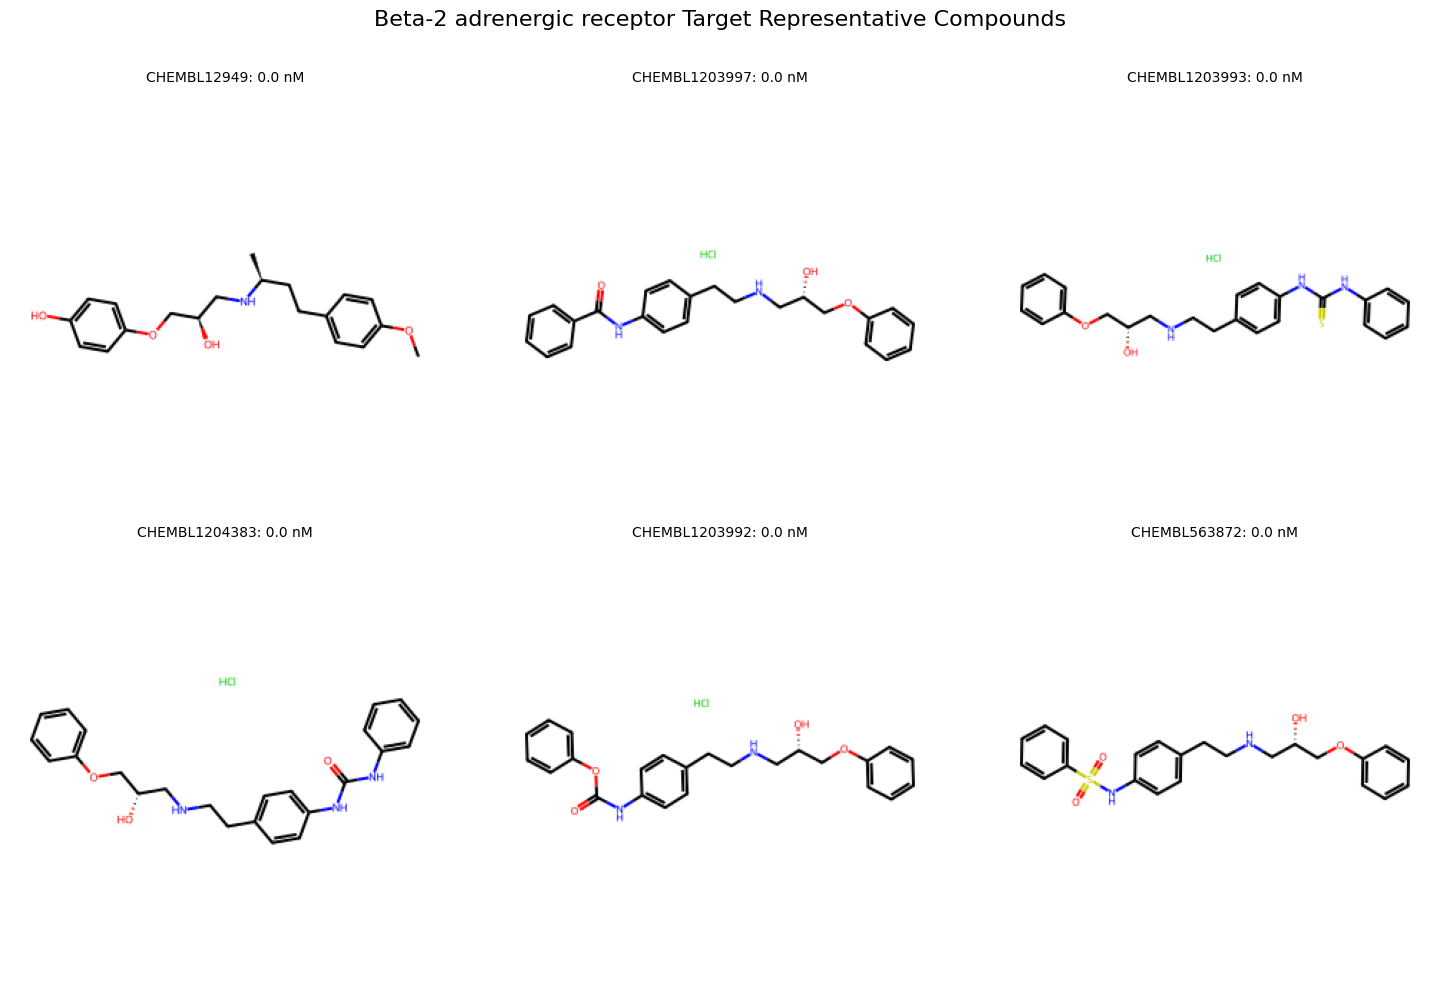


Beta-2 adrenergic receptor 화합물 구조 설명:
위 시각화는 이 타겟과 상호작용하는 대표적인 화합물들의 2D 구조를 보여줍니다.
각 구조는 분자의 원자, 결합 및 활성에 기여하는 작용기를 표시합니다.
라벨은 각 화합물의 ChEMBL ID와 활성값(nM 단위)을 보여줍니다.

Beta-2 adrenergic receptor 화합물 상세 정보:
1. CHEMBL12949 - 활성값: 0.0 nM
   SMILES: COc1ccc(CC[C@H](C)NC[C@@H](O)COc2ccc(O)cc2)cc1
   분자량: 345.44 Da, LogP: 2.75
   수소 공여체: 3, 수소 수용체: 5, 회전 가능 결합: 10

2. CHEMBL1203997 - 활성값: 0.0 nM
   SMILES: Cl.O=C(Nc1ccc(CCNC[C@H](O)COc2ccccc2)cc1)c1ccccc1
   분자량: 426.94 Da, LogP: 3.93
   수소 공여체: 3, 수소 수용체: 4, 회전 가능 결합: 10

3. CHEMBL1203993 - 활성값: 0.0 nM
   SMILES: Cl.O[C@@H](CNCCc1ccc(NC(=S)Nc2ccccc2)cc1)COc1ccccc1
   분자량: 458.03 Da, LogP: 4.49
   수소 공여체: 4, 수소 수용체: 4, 회전 가능 결합: 10

4. CHEMBL1204383 - 활성값: 0.0 nM
   SMILES: Cl.O=C(Nc1ccccc1)Nc1ccc(CCNC[C@H](O)COc2ccccc2)cc1
   분자량: 441.96 Da, LogP: 4.32
   수소 공여체: 4, 수소 수용체: 4, 회전 가능 결합: 10

5. CHEMBL1203992 - 활성값: 0.0 nM
   SMILES: Cl.O=C(Nc1ccc(CCNC[C@H](O)COc2ccccc2)cc1)Oc1ccccc1
   분자량: 442.94 Da, LogP: 4.29
   수소 공여체: 3, 수소 수용체: 5, 회전 가능 

In [ ]:
# ===================================================================
# GPCR 표적 신약 설계 프로젝트 - 3. ChEMBL 데이터베이스에서 GPCR 화합물 데이터 수집 (수정)
# ===================================================================

import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from rdkit import DataStructs  # 명시적 추가
# 최신 RDKit API 사용하되 오류 수정
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from chembl_webresource_client.new_client import new_client
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


from PIL import Image as PILImage
import io

def get_gpcr_targets_list():
    """주요 GPCR 타겟의 ChEMBL ID 리스트 반환"""
    # 타겟 목록 (실제 ChEMBL ID)
    target_dict = {
        'Adenosine A2a receptor': 'CHEMBL251',
        'Beta-2 adrenergic receptor': 'CHEMBL210',
#        'Dopamine D2 receptor': 'CHEMBL217',
#        'Dopamine D3 receptor': 'CHEMBL234',
#        'Histamine H1 receptor': 'CHEMBL231',
#        'Mu opioid receptor': 'CHEMBL233',
#        'Cannabinoid CB1 receptor': 'CHEMBL218',
#        'Serotonin 2a (5-HT2a) receptor': 'CHEMBL224'
    }

    print("수집할 GPCR 타겟 목록:")
    for name, chembl_id in target_dict.items():
        print(f"  - {name}: {chembl_id}")

    return target_dict

def fetch_gpcr_compounds_from_chembl(target_dict, min_activity=1000, max_compounds_per_target=500):
    """
    ChEMBL 데이터베이스에서 특정 GPCR 타겟에 대한 화합물 데이터 수집
    target_dict: 타겟 이름과 ChEMBL ID를 포함하는 딕셔너리
    min_activity: 최소 활성값 (nM) - 작을수록 활성이 강함
    max_compounds_per_target: 각 타겟당 최대 화합물 수
    """
    compounds_data = []

    # ChEMBL 웹 클라이언트 초기화
    activities = new_client.activity

    for target_name, target_id in tqdm(target_dict.items(), desc="GPCR 타겟 데이터 수집"):
        try:
            # 타겟에 대한 활성 데이터 검색
            activities_data = activities.filter(
                target_chembl_id=target_id,
                standard_type__in=["IC50", "Ki", "Kd", "EC50"],
                standard_relation__in=["=", "<", "<="],
                standard_units="nM"
            ).only(['molecule_chembl_id', 'canonical_smiles', 'standard_type',
                    'standard_value', 'standard_relation', 'target_chembl_id'])

            # 데이터프레임으로 변환
            activities_df = pd.DataFrame(activities_data)

            if not activities_df.empty:
                # 타겟 이름 추가
                activities_df['target_name'] = target_name

                # standard_value가 숫자가 아닌 경우 처리
                activities_df['standard_value'] = pd.to_numeric(activities_df['standard_value'], errors='coerce')
                activities_df = activities_df.dropna(subset=['standard_value'])

                # 활성값 필터링 (nM 단위, 작을수록 활성이 높음)
                activities_df = activities_df[activities_df['standard_value'] <= min_activity]

                # SMILES가 유효한 화합물만 선택
                activities_df = activities_df.dropna(subset=['canonical_smiles'])

                # 분자 객체 생성 및 유효성 검사
                valid_mols = []
                for idx, row in activities_df.iterrows():
                    try:
                        mol = Chem.MolFromSmiles(row['canonical_smiles'])
                        if mol is not None:
                            row_dict = row.to_dict()
                            row_dict['mol'] = mol
                            valid_mols.append(row_dict)
                    except:
                        continue

                activities_df = pd.DataFrame(valid_mols)

                # 중복 SMILES 제거
                if not activities_df.empty:
                    activities_df = activities_df.drop_duplicates(subset=['canonical_smiles'])

                    # 활성값 순으로 정렬하고 최대 화합물 수 제한
                    activities_df = activities_df.sort_values('standard_value').head(max_compounds_per_target)

                    compounds_data.append(activities_df)
                    print(f"타겟 {target_name} ({target_id})에서 {len(activities_df)} 개의 활성 화합물 수집")
                else:
                    print(f"타겟 {target_name} ({target_id})에서 유효한 분자가 없습니다.")

        except Exception as e:
            print(f"타겟 {target_name} ({target_id}) 처리 중 오류 발생: {str(e)}")
            continue

    # 모든 데이터 병합
    if compounds_data:
        all_compounds = pd.concat(compounds_data, ignore_index=True)
        return all_compounds
    else:
        print("수집된 화합물 데이터가 없습니다.")
        return pd.DataFrame()

def preprocess_molecules(compounds_df):
    """수집된 분자 데이터 전처리 (수정 버전)"""
    print("분자 데이터 전처리 중... (수정된 핑거프린트 변환 사용)")

    # 분자 정규화 및 표준화
    processed_data = []

    for idx, row in tqdm(compounds_df.iterrows(), total=len(compounds_df), desc="분자 처리"):
        smiles = row['canonical_smiles']
        mol = row['mol']

        try:
            # Salt 제거
            mol = Chem.RemoveHs(mol)

            # 표준화된 SMILES 생성
            canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)

            # 분자량 계산
            mol_weight = Descriptors.MolWt(mol)

            # Lipinski Rule of 5 특성
            logp = Descriptors.MolLogP(mol)
            h_donors = Descriptors.NumHDonors(mol)
            h_acceptors = Descriptors.NumHAcceptors(mol)
            rot_bonds = Descriptors.NumRotatableBonds(mol)

            # 2D 분자 핑거프린트 생성 (ECFP4)
            # GetMorganFingerprintAsBitVect는 ExplicitBitVect 객체를 반환
            fingerprint = GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)

            # 올바른 방법으로 넘파이 배열로 변환
            fp_array = np.zeros((0,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(fingerprint, fp_array)

            # 처리된 데이터 저장
            row_data = {
                'molecule_chembl_id': row['molecule_chembl_id'],
                'canonical_smiles': canonical_smiles,
                'standard_value': row['standard_value'],
                'standard_type': row['standard_type'],
                'target_chembl_id': row['target_chembl_id'],
                'target_name': row['target_name'],
                'mol_weight': mol_weight,
                'logp': logp,
                'h_donors': h_donors,
                'h_acceptors': h_acceptors,
                'rotatable_bonds': rot_bonds,
                'fingerprint': fp_array,
                'mol': mol
            }

            processed_data.append(row_data)

        except Exception as e:
            print(f"분자 {smiles} 처리 중 오류 발생: {str(e)}")
            continue

    # 처리된 데이터프레임 생성
    processed_df = pd.DataFrame(processed_data)
    print(f"전처리 완료: {len(processed_df)} 분자")

    return processed_df

from PIL import Image as PILImage
import io




def analyze_dataset(processed_df, save_dir=None):
    """데이터셋 분석 및 시각화 (코랩에서 직접 보기 버전)"""
    # 경고 메시지 숨기기
    import warnings
    from rdkit import RDLogger
    RDLogger.DisableLog('rdApp.*')
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)

    print("데이터셋 분석 중...")

    target_counts = processed_df['target_name'].value_counts()

    # 데이터셋 통계 시각화 (영문 그래프)
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.barplot(x=target_counts.values, y=target_counts.index)
    plt.title('Number of Compounds per Target')
    plt.xlabel('Number of Compounds')
    plt.tight_layout()

    plt.subplot(2, 2, 2)
    sns.histplot(processed_df['mol_weight'], bins=30)
    plt.title('Molecular Weight Distribution')
    plt.xlabel('Molecular Weight (Da)')
    plt.tight_layout()

    plt.subplot(2, 2, 3)
    sns.histplot(processed_df['logp'], bins=30)
    plt.title('LogP Distribution')
    plt.xlabel('LogP')
    plt.tight_layout()

    plt.subplot(2, 2, 4)
    sns.histplot(np.log10(processed_df['standard_value']), bins=30)
    plt.title('Activity Distribution (Log10 nM)')
    plt.xlabel('Log10(Activity nM)')
    plt.tight_layout()

    # 코랩에서 바로 표시
    plt.show()

    # 그래프에 대한 한글 설명 추가
    print("\n그래프 설명:")
    print("1. 타겟별 화합물 수: 각 GPCR 타겟에 대한 화합물의 분포를 보여줍니다.")
    print("2. 분자량 분포: 데이터셋의 모든 화합물에 대한 분자량 범위를 표시합니다.")
    print("3. LogP 분포: 계산된 LogP 값의 분포를 보여주며, 이는 화합물의 지용성을 나타냅니다.")
    print("4. 활성 분포: 생물학적 활성 값(log10 nM 단위)의 분포를 보여줍니다.")

    # 타겟별 화합물 구조 시각화
    print("\n타겟별 대표 화합물 구조:")

    for target_name in target_counts.index:
        print(f"\n## {target_name} 타겟 대표 화합물:")

        target_df = processed_df[processed_df['target_name'] == target_name]

        try:
            # 개별 분자를 하나씩 시각화하는 방식으로 변경
            sample_size = min(6, len(target_df))
            fig, axes = plt.subplots(2, 3, figsize=(15, 10))
            axes = axes.flatten()

            valid_count = 0
            for i, (_, row) in enumerate(target_df.head(sample_size * 2).iterrows()):  # 더 많은 샘플을 가져와서 유효한 것만 선택
                if valid_count >= sample_size:
                    break

                mol = row.get('mol')
                if mol is not None and isinstance(mol, Chem.rdchem.Mol):
                    try:
                        # 개별 분자를 이미지로 변환
                        img = Draw.MolToImage(mol, size=(300, 300))

                        # 이미지를 해당 위치에 표시
                        axes[valid_count].imshow(img)
                        axes[valid_count].set_title(f"{row['molecule_chembl_id']}: {row['standard_value']} nM", fontsize=10)
                        axes[valid_count].axis('off')

                        valid_count += 1
                    except Exception as e:
                        print(f"개별 분자 시각화 오류: {str(e)}")
                        continue

            # 사용하지 않는 축 제거
            for j in range(valid_count, len(axes)):
                fig.delaxes(axes[j])

            if valid_count > 0:
                plt.suptitle(f"{target_name} Target Representative Compounds", fontsize=16)
                plt.tight_layout()
                plt.subplots_adjust(top=0.9)
                plt.show()

                # 화합물 구조에 대한 한글 설명
                print(f"\n{target_name} 화합물 구조 설명:")
                print("위 시각화는 이 타겟과 상호작용하는 대표적인 화합물들의 2D 구조를 보여줍니다.")
                print("각 구조는 분자의 원자, 결합 및 활성에 기여하는 작용기를 표시합니다.")
                print("라벨은 각 화합물의 ChEMBL ID와 활성값(nM 단위)을 보여줍니다.")

                # 화합물 정보 출력 (한글)
                print(f"\n{target_name} 화합물 상세 정보:")
                valid_index = 0
                for i, (_, row) in enumerate(target_df.head(min(5, len(target_df))).iterrows()):
                    mol = row.get('mol')
                    if mol is not None and isinstance(mol, Chem.rdchem.Mol):
                        print(f"{valid_index+1}. {row['molecule_chembl_id']} - 활성값: {row['standard_value']} nM")
                        print(f"   SMILES: {row['canonical_smiles']}")
                        print(f"   분자량: {row['mol_weight']:.2f} Da, LogP: {row['logp']:.2f}")
                        print(f"   수소 공여체: {row['h_donors']}, 수소 수용체: {row['h_acceptors']}, 회전 가능 결합: {row['rotatable_bonds']}")
                        print()
                        valid_index += 1
            else:
                print("유효한 분자 구조가 없습니다.")

        except Exception as e:
            print(f"화합물 시각화 중 오류 발생: {str(e)}")
            print("개별 분자 시각화 방식으로 시도합니다...")

            # 대체 시각화 방법: 개별 분자를 각각 시각화
            try:
                for i, (_, row) in enumerate(target_df.head(min(3, len(target_df))).iterrows()):
                    mol = row.get('mol')
                    if mol is not None and isinstance(mol, Chem.rdchem.Mol):
                        # 단일 분자 시각화
                        plt.figure(figsize=(5, 5))
                        img = Draw.MolToImage(mol, size=(400, 400))
                        plt.imshow(img)
                        plt.title(f"{row['molecule_chembl_id']}: {row['standard_value']} nM")
                        plt.axis('off')
                        plt.tight_layout()
                        plt.show()

                        print(f"화합물 ID: {row['molecule_chembl_id']}")
                        print(f"활성값: {row['standard_value']} nM")
                        print(f"SMILES: {row['canonical_smiles']}")
                        print(f"분자량: {row['mol_weight']:.2f} Da, LogP: {row['logp']:.2f}")
                        print(f"수소 공여체: {row['h_donors']}, 수소 수용체: {row['h_acceptors']}, 회전 가능 결합: {row['rotatable_bonds']}")
                        print()
            except Exception as e2:
                print(f"대체 시각화 방법도 실패: {str(e2)}")


    # 데이터셋 요약 정보 생성
    summary = {
        'total_compounds': len(processed_df),
        'target_counts': target_counts.to_dict(),
        'avg_mol_weight': processed_df['mol_weight'].mean(),
        'avg_logp': processed_df['logp'].mean(),
        'avg_activity': processed_df['standard_value'].mean(),
        'lipinski_compliant': sum((processed_df['mol_weight'] <= 500) &
                                 (processed_df['logp'] <= 5) &
                                 (processed_df['h_donors'] <= 5) &
                                 (processed_df['h_acceptors'] <= 10))
    }

    # 요약 정보 출력
    print("\nGPCR 타겟 화합물 데이터셋 요약")
    print("============================\n")
    print(f"총 화합물 수: {summary['total_compounds']}\n")

    print("타겟별 화합물 수:")
    for target, count in summary['target_counts'].items():
        print(f"  - {target}: {count}")

    print(f"\n평균 분자량: {summary['avg_mol_weight']:.2f} Da")
    print(f"평균 LogP: {summary['avg_logp']:.2f}")
    print(f"평균 활성값: {summary['avg_activity']:.2f} nM")
    print(f"Lipinski Rule of 5 준수 화합물: {summary['lipinski_compliant']} ({summary['lipinski_compliant']/summary['total_compounds']*100:.1f}%)")

    # 파일 저장 옵션 (선택적)
    if save_dir:
        # 요약 정보를 파일로 저장
        with open(os.path.join(save_dir, 'dataset_summary.txt'), 'w') as f:
            f.write("GPCR 타겟 화합물 데이터셋 요약\n")
            f.write("============================\n\n")
            f.write(f"총 화합물 수: {summary['total_compounds']}\n\n")

            f.write("타겟별 화합물 수:\n")
            for target, count in summary['target_counts'].items():
                f.write(f"  - {target}: {count}\n")

            f.write(f"\n평균 분자량: {summary['avg_mol_weight']:.2f} Da\n")
            f.write(f"평균 LogP: {summary['avg_logp']:.2f}\n")
            f.write(f"평균 활성값: {summary['avg_activity']:.2f} nM\n")
            f.write(f"Lipinski Rule of 5 준수 화합물: {summary['lipinski_compliant']} ({summary['lipinski_compliant']/summary['total_compounds']*100:.1f}%)\n")

    print("\n데이터셋 분석 완료")
    return summary



def collect_and_process_data():
    """GPCR 화합물 데이터 수집 및 처리 메인 함수"""
    # 작업 디렉토리 설정
    base_dir = os.path.join(os.getcwd(), "gpcr_drug_design")
    data_dir = os.path.join(base_dir, "data")

    # 디렉토리가 없으면 생성
    if not os.path.exists(data_dir):
        os.makedirs(data_dir, exist_ok=True)

    # GPCR 타겟 목록 획득
    target_dict = get_gpcr_targets_list()

    # ChEMBL에서 GPCR 타겟 화합물 데이터 수집
    compounds_df = fetch_gpcr_compounds_from_chembl(target_dict, min_activity=1000)

    # 데이터 전처리
    if not compounds_df.empty:
        processed_df = preprocess_molecules(compounds_df)

        # 데이터 저장
        processed_df.to_pickle(os.path.join(data_dir, 'gpcr_compounds.pkl'))

        # SMILES 문자열만 별도 저장 (생성 모델 학습용)
        processed_df[['canonical_smiles', 'target_name', 'standard_value']].to_csv(
            os.path.join(data_dir, 'gpcr_compounds_smiles.csv'), index=False)

        # 데이터셋 분석
        summary = analyze_dataset(processed_df, data_dir)

        print(f"데이터 수집 및 전처리 완료: {len(processed_df)} 화합물 저장됨")
        return processed_df
    else:
        print("수집된 데이터가 없습니다. 프로세스를 종료합니다.")
        return None

if __name__ == "__main__":
    collect_and_process_data()

# 실행 시 GPCR 타겟 데이터 수집에서 시간이 많이 소요됩니다. 타겟 수를 줄이 거나 500개를 100개로 수정하시면 빠르게 됩니다. 다른 타겟도 데이터 수집 가능합니다.

#4. VAE 기반 분자 생성 모델 구현

In [ ]:
# ===================================================================
# GPCR 표적 신약 설계 프로젝트 - 4. VAE 기반 분자 생성 모델 구현
# ===================================================================
!pip install selfies
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
import selfies as sf
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pickle
from sklearn.model_selection import train_test_split

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 디바이스: {device}")

# =======================================================
# 데이터셋 전처리 및 로드
# =======================================================

class MoleculeDataset(Dataset):
    """SELFIES 인코딩을 사용한 분자 데이터셋"""

    def __init__(self, smiles_list, target_list=None):
        self.smiles = smiles_list
        self.targets = target_list

        # SELFIES 어휘 및 인덱스 매핑 생성
        self.char_to_idx = {}
        self.idx_to_char = {}
        self.max_length = 0

        # SMILES를 SELFIES로 변환하고 문자 목록 수집
        selfies_list = []
        chars = set()

        for smiles in tqdm(smiles_list, desc="SELFIES 변환"):
            try:
                selfie = sf.encoder(smiles)
                selfies_list.append(selfie)

                # 최대 길이 업데이트
                # 제너레이터를 리스트로 변환
                selfie_tokens = list(sf.split_selfies(selfie))
                self.max_length = max(self.max_length, len(selfie_tokens))

                # 문자 집합 업데이트
                for char in selfie_tokens:
                    chars.add(char)
            except Exception as e:
                print(f"SELFIES 변환 오류: {e}")
                selfies_list.append("")  # 실패한 경우 빈 문자열 추가

        # 특수 토큰 추가
        special_tokens = ["<PAD>", "<START>", "<END>"]
        chars = special_tokens + sorted(list(chars))

        # 문자-인덱스 매핑 생성
        for i, char in enumerate(chars):
            self.char_to_idx[char] = i
            self.idx_to_char[i] = char

        self.vocab_size = len(chars)
        print(f"어휘 크기: {self.vocab_size}, 최대 SELFIES 길이: {self.max_length}")

        # SELFIES 리스트 저장
        self.selfies = selfies_list

    def __len__(self):
        return len(self.selfies)

    def __getitem__(self, idx):
        selfie = self.selfies[idx]

        # 유효한 SELFIES만 처리
        if not selfie:
            # 유효하지 않은 경우 패딩된 텐서 반환
            encoded = torch.zeros(self.max_length + 2, dtype=torch.long)
            return encoded

        # SELFIES 토큰화 및 인덱스 변환
        # 제너레이터를 리스트로 변환
        selfie_tokens = ["<START>"] + list(sf.split_selfies(selfie)) + ["<END>"]
        padding = ["<PAD>"] * (self.max_length + 2 - len(selfie_tokens))
        selfie_tokens.extend(padding)

        # 텐서로 변환
        encoded = torch.tensor([self.char_to_idx[char] for char in selfie_tokens], dtype=torch.long)

        if self.targets is not None:
            target = self.targets[idx]
            return encoded, target

        return encoded

    def decode_selfies(self, token_indices):
        """인덱스 시퀀스를 SELFIES 문자열로 디코딩"""
        tokens = [self.idx_to_char[idx] for idx in token_indices if idx < len(self.idx_to_char)]

        # 특수 토큰 제거 및 유효한 시퀀스 찾기
        valid_tokens = []
        for token in tokens:
            if token in ["<PAD>", "<START>"]:
                continue
            if token == "<END>":
                break
            valid_tokens.append(token)

        # SELFIES 문자열로 결합
        try:
            selfie = "".join(valid_tokens)
            # SELFIES를 SMILES로 변환
            smiles = sf.decoder(selfie)
            return selfie, smiles
        except Exception as e:
            print(f"SELFIES 디코딩 오류: {e}")
            return "", ""

    def get_vocab_info(self):
        """어휘 정보 반환"""
        return {
            'char_to_idx': self.char_to_idx,
            'idx_to_char': self.idx_to_char,
            'vocab_size': self.vocab_size,
            'max_length': self.max_length
        }

# =======================================================
# VAE 모델 정의
# =======================================================

class VAE(nn.Module):
    def __init__(self, vocab_size, max_length, embedding_dim=128, hidden_dim=256, latent_dim=64):
        super(VAE, self).__init__()

        self.vocab_size = vocab_size
        self.max_length = max_length
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim

        # 임베딩 레이어
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # 인코더
        self.encoder_rnn = nn.GRU(
            embedding_dim,
            hidden_dim,
            num_layers=3,
            batch_first=True,
            bidirectional=True,
            dropout=0.3
        )

        # 잠재 변수 매핑
        self.fc_mu = nn.Linear(hidden_dim * 2, latent_dim)
        self.fc_var = nn.Linear(hidden_dim * 2, latent_dim)

        # 디코더 초기 상태
        self.decoder_init = nn.Linear(latent_dim, hidden_dim)

        # 디코더
        self.decoder_rnn = nn.GRU(
            embedding_dim + latent_dim,
            hidden_dim,
            num_layers=3,
            batch_first=True,
            dropout=0.3
        )

        # 출력 레이어
        self.output = nn.Linear(hidden_dim, vocab_size)

    def encode(self, x):
        """입력 시퀀스를 잠재 공간으로 인코딩"""
        # 임베딩
        embedded = self.embedding(x)

        # RNN 통과
        _, hidden = self.encoder_rnn(embedded)

        # 양방향 RNN의 마지막 레이어 출력 결합
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)

        # 잠재 변수 매핑
        mu = self.fc_mu(hidden)
        log_var = self.fc_var(hidden)

        return mu, log_var

    def reparameterize(self, mu, log_var):
        """재매개화 트릭"""
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z, x):
        """잠재 변수에서 시퀀스 디코딩"""
        batch_size = x.size(0)
        seq_length = x.size(1)

        # 첫 번째 RNN 상태 초기화
        h = self.decoder_init(z)
        h = h.unsqueeze(0).repeat(3, 1, 1)  # 3 레이어

        # 입력 임베딩
        embedded = self.embedding(x)

        # 각 타임스텝에 잠재 벡터 연결
        z_expand = z.unsqueeze(1).repeat(1, seq_length, 1)
        decoder_input = torch.cat([embedded, z_expand], dim=2)

        # RNN 통과
        output, _ = self.decoder_rnn(decoder_input, h)

        # 어휘 크기로 매핑
        output = self.output(output)

        return output

    def forward(self, x):
        """순방향 패스"""
        # 인코딩
        mu, log_var = self.encode(x)

        # 잠재 변수 샘플링
        z = self.reparameterize(mu, log_var)

        # 디코딩 (시작 토큰 이후부터 입력)
        x_shift = x[:, :-1]  # 마지막 토큰 제외
        output = self.decode(z, x_shift)

        # 시작 토큰 제외한 출력
        target = x[:, 1:]

        return output, target, mu, log_var

    def generate(self, z, start_token, max_length):
        """지정된 잠재 벡터로부터 새로운 분자 생성"""
        with torch.no_grad():
            batch_size = z.size(0)

            # 첫 번째 RNN 상태 초기화
            h = self.decoder_init(z)
            h = h.unsqueeze(0).repeat(3, 1, 1)  # 3 레이어

            # 시작 토큰으로 초기화
            current_token = torch.tensor([[start_token]] * batch_size, device=z.device)

            # 결과 저장
            generated_tokens = []

            for _ in range(max_length):
                # 현재 토큰 임베딩
                embedded = self.embedding(current_token)

                # 잠재 벡터 연결
                decoder_input = torch.cat([embedded, z.unsqueeze(1)], dim=2)

                # RNN 단계 실행
                output, h = self.decoder_rnn(decoder_input, h)

                # 어휘 분포 예측
                logits = self.output(output.squeeze(1))

                # 다음 토큰 샘플링
                probs = F.softmax(logits, dim=1)
                next_token = torch.multinomial(probs, 1)

                # 결과 저장
                generated_tokens.append(next_token)

                # 다음 단계 준비
                current_token = next_token

            # 모든 생성된 토큰 결합
            return torch.cat(generated_tokens, dim=1)

# =======================================================
# 모델 학습
# =======================================================

def vae_loss_function(output, target, mu, log_var, beta=0.1):
    """VAE 손실 함수: 재구성 손실 + KL 발산"""
    # 재구성 손실 (교차 엔트로피)
    recon_loss = F.cross_entropy(
        output.reshape(-1, output.size(2)),
        target.reshape(-1),
        ignore_index=0  # PAD 토큰 무시
    )

    # KL 발산
    kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    kl_loss = kl_loss / mu.size(0)  # 배치 크기로 정규화

    # 총 손실
    total_loss = recon_loss + beta * kl_loss

    return total_loss, recon_loss, kl_loss

def train_vae_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-3):
    """VAE 모델 학습"""
    optimizer = Adam(model.parameters(), lr=learning_rate)
    model.to(device)

    train_losses = []
    val_losses = []

    # 디렉토리 확인
    os.makedirs("gpcr_drug_design/models", exist_ok=True)

    for epoch in range(num_epochs):
        # 학습 모드
        model.train()
        epoch_train_loss = 0
        epoch_recon_loss = 0
        epoch_kl_loss = 0

        # 학습 데이터 처리
        for batch_idx, data in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} 학습")):
            data = data.to(device)
            optimizer.zero_grad()

            # 모델 통과
            output, target, mu, log_var = model(data)

            # 손실 계산
            loss, recon_loss, kl_loss = vae_loss_function(output, target, mu, log_var)

            # 역전파
            loss.backward()

            # 기울기 클리핑
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # 최적화
            optimizer.step()

            # 손실 누적
            epoch_train_loss += loss.item()
            epoch_recon_loss += recon_loss.item()
            epoch_kl_loss += kl_loss.item()

        # 평균 학습 손실
        epoch_train_loss /= len(train_loader)
        epoch_recon_loss /= len(train_loader)
        epoch_kl_loss /= len(train_loader)
        train_losses.append(epoch_train_loss)

        # 검증 모드
        model.eval()
        epoch_val_loss = 0

        with torch.no_grad():
            for data in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} 검증"):
                data = data.to(device)

                # 모델 통과
                output, target, mu, log_var = model(data)

                # 손실 계산
                loss, _, _ = vae_loss_function(output, target, mu, log_var)

                # 손실 누적
                epoch_val_loss += loss.item()

        # 평균 검증 손실
        epoch_val_loss /= len(val_loader)
        val_losses.append(epoch_val_loss)

        # 진행 상황 출력
        print(f"Epoch {epoch+1}/{num_epochs}: "
              f"Train Loss={epoch_train_loss:.4f} "
              f"(Recon={epoch_recon_loss:.4f}, KL={epoch_kl_loss:.4f}), "
              f"Val Loss={epoch_val_loss:.4f}")

        # 모델 저장 (5 에폭마다)
        if (epoch + 1) % 5 == 0:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': epoch_train_loss,
                'val_loss': epoch_val_loss
            }, f"gpcr_drug_design/models/vae_model_epoch_{epoch+1}.pt")

    # 손실 그래프 플로팅
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # 디렉토리 확인
    os.makedirs("gpcr_drug_design/results", exist_ok=True)
    plt.savefig('gpcr_drug_design/results/vae_training_loss.png')
    plt.close()

    return train_losses, val_losses

# =======================================================
# 분자 생성 및 평가
# =======================================================

def generate_molecules(model, dataset, n_samples=100, temperature=1.0):
    """학습된 VAE에서 새로운 분자 생성"""
    model.eval()

    # 잠재 공간에서 샘플링
    z = torch.randn(n_samples, model.latent_dim).to(device) * temperature

    # 시작 토큰 인덱스
    start_token = dataset.char_to_idx["<START>"]

    # 분자 생성
    with torch.no_grad():
        generated_tokens = model.generate(z, start_token, dataset.max_length)

    # SMILES로 디코딩
    valid_smiles = []

    for i in range(n_samples):
        tokens = generated_tokens[i].cpu().numpy()
        selfie, smiles = dataset.decode_selfies(tokens)

        # RDKit로 유효성 검사
        if smiles:
            mol = Chem.MolFromSmiles(smiles)
            if mol is not None:
                valid_smiles.append(smiles)

    return valid_smiles

def evaluate_molecules(generated_smiles, reference_smiles):
    """생성된 분자의 유효성 및 다양성 평가"""
    # 유효한 SMILES 비율
    valid_ratio = len(generated_smiles) / 100
    print(f"유효 분자 비율: {valid_ratio:.2f}")

    # 고유한 SMILES 수
    unique_smiles = set(generated_smiles)
    unique_ratio = len(unique_smiles) / len(generated_smiles) if generated_smiles else 0
    print(f"고유 분자 비율: {unique_ratio:.2f}")

    # 참조 세트와의 중복 확인
    reference_set = set(reference_smiles)
    novel_smiles = [s for s in unique_smiles if s not in reference_set]
    novel_ratio = len(novel_smiles) / len(unique_smiles) if unique_smiles else 0
    print(f"새로운 분자 비율: {novel_ratio:.2f}")

    # 분자 속성 계산
    if generated_smiles:
        mols = [Chem.MolFromSmiles(s) for s in generated_smiles]
        mols = [m for m in mols if m is not None]

        # 분자량
        mol_weights = [Chem.Descriptors.MolWt(mol) for mol in mols]
        avg_mol_weight = sum(mol_weights) / len(mol_weights) if mol_weights else 0

        # LogP
        logp_values = [Chem.Descriptors.MolLogP(mol) for mol in mols]
        avg_logp = sum(logp_values) / len(logp_values) if logp_values else 0

        # Lipinski 규칙 준수 여부
        lipinski_pass = 0
        for mol in mols:
            mw = Chem.Descriptors.MolWt(mol)
            logp = Chem.Descriptors.MolLogP(mol)
            h_donors = Chem.Descriptors.NumHDonors(mol)
            h_acceptors = Chem.Descriptors.NumHAcceptors(mol)

            if mw <= 500 and logp <= 5 and h_donors <= 5 and h_acceptors <= 10:
                lipinski_pass += 1

        lipinski_ratio = lipinski_pass / len(mols) if mols else 0

        print(f"평균 분자량: {avg_mol_weight:.2f}")
        print(f"평균 LogP: {avg_logp:.2f}")
        print(f"Lipinski 규칙 준수 비율: {lipinski_ratio:.2f}")

    # 평가 결과 저장
    results = {
        'valid_ratio': valid_ratio,
        'unique_ratio': unique_ratio,
        'novel_ratio': novel_ratio,
        'num_valid': len(generated_smiles),
        'num_unique': len(unique_smiles),
        'num_novel': len(novel_smiles)
    }

    return results, novel_smiles

def visualize_generated_molecules(smiles_list, n_mols=10, output_path='gpcr_drug_design/results/generated_molecules.png'):
    """생성된 분자 시각화 - 개선된 버전"""
    if not smiles_list:
        print("시각화할 분자가 없습니다.")
        return

    # 저장 디렉토리 확인
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # 표시할 분자 선택
    if len(smiles_list) > n_mols:
        smiles_sample = random.sample(smiles_list, n_mols)
    else:
        smiles_sample = smiles_list

    # RDKit 분자 객체로 변환
    mols = [Chem.MolFromSmiles(s) for s in smiles_sample]
    mols = [m for m in mols if m is not None]

    if not mols:
        print("유효한 분자가 없습니다.")
        return

    # 분자 그리드 생성 (RDKit 내장 기능 사용)
    try:
        # 분자 속성 계산
        legends = []
        for mol in mols:
            mw = Chem.Descriptors.MolWt(mol)
            logp = Chem.Descriptors.MolLogP(mol)
            legends.append(f"MW: {mw:.1f}, LogP: {logp:.1f}")

        # 그리드 이미지 생성
        img = Draw.MolsToGridImage(
            mols,
            molsPerRow=5,
            subImgSize=(300, 300),
            legends=legends,
            useSVG=False
        )

        # 이미지 저장
        img.save(output_path)
        print(f"분자 시각화 저장: {output_path}")
    except Exception as e:
        print(f"분자 시각화 중 오류 발생: {e}")

        # 대체 방법: 개별 이미지 저장
        try:
            for i, mol in enumerate(mols[:min(10, len(mols))]):
                img_path = f"gpcr_drug_design/results/molecule_{i+1}.png"
                Draw.MolToFile(mol, img_path, size=(300, 300))
            print(f"개별 분자 이미지가 gpcr_drug_design/results/ 디렉토리에 저장되었습니다.")
        except Exception as e2:
            print(f"대체 시각화 방법도 실패: {e2}")




# =======================================================
# 메인 실행 함수
# =======================================================

def train_and_generate():
    """VAE 모델 학습 및 분자 생성 프로세스"""
    # 작업 디렉토리 확인
    base_dir = os.path.join(os.getcwd(), "gpcr_drug_design")
    os.makedirs(base_dir, exist_ok=True)
    os.makedirs(os.path.join(base_dir, "models"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "results"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "data"), exist_ok=True)

    # 데이터 로드
    data_path = "gpcr_drug_design/data/gpcr_compounds_smiles.csv"

    # 데이터 파일이 없는 경우 샘플 데이터 생성
    if not os.path.exists(data_path):
        print(f"데이터 파일이 존재하지 않습니다: {data_path}")
        print("샘플 데이터를 생성합니다...")

        # 샘플 SMILES 생성
        sample_smiles = [
            "CC(=O)OC1=CC=CC=C1C(=O)O",  # 아스피린
            "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",  # 카페인
            "CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2",  # 페노바르비탈
            "CC(C)NCC(O)COC1=CC=CC2=C1C=CO2",  # 프로프라놀롤
            "CN1C2=C(C(=O)N(C1=O)C)NC=N2",  # 테오필린
            "COC1=CC2=C(C=C1OC)C(=O)C(CC2)(C)C",  # 와파린
            "CC(=O)NC1=CC=C(O)C=C1",  # 아세트아미노펜
            "CC1=CN(C(=O)NC1=O)C2CC(C(C2O)CO)O",  # 지도부딘
            "CCOC(=O)C1=C(NC(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)COCCN",  # 암로디핀
            "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"  # 이부프로펜
        ]

        # 샘플 데이터프레임 생성
        df = pd.DataFrame({'canonical_smiles': sample_smiles})

        # 데이터 저장
        os.makedirs(os.path.dirname(data_path), exist_ok=True)
        df.to_csv(data_path, index=False)
        print(f"샘플 데이터가 저장되었습니다: {data_path}")

    # 데이터 로드
    df = pd.read_csv(data_path)

    # SMILES만 추출
    smiles_list = df['canonical_smiles'].tolist()

    # 학습/검증 분할
    train_smiles, val_smiles = train_test_split(smiles_list, test_size=0.2, random_state=42)

    # 데이터셋 생성
    train_dataset = MoleculeDataset(train_smiles)
    val_dataset = MoleculeDataset(val_smiles)

    # 데이터 로더 생성
    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # 어휘 정보 획득
    vocab_info = train_dataset.get_vocab_info()

    # 모델 초기화
    model = VAE(
        vocab_size=vocab_info['vocab_size'],
        max_length=vocab_info['max_length'] + 2,  # 시작/종료 토큰 포함
        embedding_dim=128,
        hidden_dim=256,
        latent_dim=64
    )

    # 모델 정보 출력
    print(model)
    print(f"모델 파라미터 수: {sum(p.numel() for p in model.parameters())}")

    # 모델 학습
    train_losses, val_losses = train_vae_model(
        model,
        train_loader,
        val_loader,
        num_epochs=30, # 필요시 변경하세요
        learning_rate=0.001
    )

    # 어휘 정보 저장
    with open('gpcr_drug_design/models/vocab_info.pkl', 'wb') as f:
        pickle.dump(vocab_info, f)

    # 최종 모델 저장
    torch.save({
        'model_state_dict': model.state_dict(),
        'vocab_info': vocab_info
    }, 'gpcr_drug_design/models/vae_model_final.pt')

    # 분자 생성
    generated_smiles = generate_molecules(model, train_dataset, n_samples=100, temperature=0.8)

    # 생성된 분자 평가
    results, novel_smiles = evaluate_molecules(generated_smiles, smiles_list)

    # 생성된 분자 시각화
    visualize_generated_molecules(generated_smiles)

    # 결과 저장
    with open('gpcr_drug_design/results/generation_results.txt', 'w') as f:
        f.write("VAE 분자 생성 결과\n")
        f.write("==================\n\n")
        f.write(f"생성 분자 수: 100\n")
        f.write(f"유효 분자 수: {results['num_valid']} ({results['valid_ratio']:.2f})\n")
        f.write(f"고유 분자 수: {results['num_unique']} ({results['unique_ratio']:.2f})\n")
        f.write(f"새로운 분자 수: {results['num_novel']} ({results['novel_ratio']:.2f})\n\n")

        f.write("생성된 분자 (최대 10개):\n")
        for i, smiles in enumerate(generated_smiles[:10]):
            f.write(f"{i+1}. {smiles}\n")

    # 새로운 분자 SMILES 저장
    with open('gpcr_drug_design/results/generated_molecules.csv', 'w') as f:
        f.write("smiles\n")
        for smiles in novel_smiles:
            f.write(f"{smiles}\n")

    print("분자 생성 완료, 결과 저장됨")
    return model, generated_smiles

if __name__ == "__main__":
    # 학습 및 생성 실행
    model, molecules = train_and_generate()



사용 디바이스: cuda


SELFIES 변환: 100%|██████████| 800/800 [00:00<00:00, 2296.14it/s]


어휘 크기: 45, 최대 SELFIES 길이: 114


SELFIES 변환: 100%|██████████| 200/200 [00:00<00:00, 2230.02it/s]


어휘 크기: 36, 최대 SELFIES 길이: 108
VAE(
  (embedding): Embedding(45, 128)
  (encoder_rnn): GRU(128, 256, num_layers=3, batch_first=True, dropout=0.3, bidirectional=True)
  (fc_mu): Linear(in_features=512, out_features=64, bias=True)
  (fc_var): Linear(in_features=512, out_features=64, bias=True)
  (decoder_init): Linear(in_features=64, out_features=256, bias=True)
  (decoder_rnn): GRU(192, 256, num_layers=3, batch_first=True, dropout=0.3)
  (output): Linear(in_features=256, out_features=45, bias=True)
)
모델 파라미터 수: 4193069


Epoch 1/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.39it/s]


Epoch 1/30: Train Loss=2.8690 (Recon=2.8372, KL=0.3181), Val Loss=4.7918


Epoch 2/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.41it/s]


Epoch 2/30: Train Loss=2.3291 (Recon=2.3252, KL=0.0393), Val Loss=5.0749


Epoch 3/30 검증: 100%|██████████| 4/4 [00:00<00:00, 43.54it/s]


Epoch 3/30: Train Loss=2.1523 (Recon=2.1505, KL=0.0181), Val Loss=5.1301


Epoch 4/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.38it/s]


Epoch 4/30: Train Loss=1.9406 (Recon=1.9396, KL=0.0103), Val Loss=5.6178


Epoch 5/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.80it/s]


Epoch 5/30: Train Loss=1.7567 (Recon=1.7560, KL=0.0074), Val Loss=5.8977


Epoch 6/30 검증: 100%|██████████| 4/4 [00:00<00:00, 47.79it/s]


Epoch 6/30: Train Loss=1.6036 (Recon=1.6030, KL=0.0060), Val Loss=6.3307


Epoch 7/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.59it/s]


Epoch 7/30: Train Loss=1.4658 (Recon=1.4652, KL=0.0057), Val Loss=6.5328


Epoch 8/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.45it/s]


Epoch 8/30: Train Loss=1.3459 (Recon=1.3453, KL=0.0055), Val Loss=6.7652


Epoch 9/30 검증: 100%|██████████| 4/4 [00:00<00:00, 46.04it/s]


Epoch 9/30: Train Loss=1.2475 (Recon=1.2469, KL=0.0052), Val Loss=6.8284


Epoch 10/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.10it/s]


Epoch 10/30: Train Loss=1.1501 (Recon=1.1495, KL=0.0050), Val Loss=6.9665


Epoch 11/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.81it/s]


Epoch 11/30: Train Loss=1.0725 (Recon=1.0720, KL=0.0047), Val Loss=7.0776


Epoch 12/30 검증: 100%|██████████| 4/4 [00:00<00:00, 43.84it/s]


Epoch 12/30: Train Loss=1.0095 (Recon=1.0091, KL=0.0047), Val Loss=7.0356


Epoch 13/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.45it/s]


Epoch 13/30: Train Loss=0.9492 (Recon=0.9487, KL=0.0045), Val Loss=6.9883


Epoch 14/30 검증: 100%|██████████| 4/4 [00:00<00:00, 43.71it/s]


Epoch 14/30: Train Loss=0.9017 (Recon=0.9013, KL=0.0044), Val Loss=7.0184


Epoch 15/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.86it/s]


Epoch 15/30: Train Loss=0.8575 (Recon=0.8571, KL=0.0040), Val Loss=6.9816


Epoch 16/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.67it/s]


Epoch 16/30: Train Loss=0.8198 (Recon=0.8194, KL=0.0037), Val Loss=7.1386


Epoch 17/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.61it/s]


Epoch 17/30: Train Loss=0.7869 (Recon=0.7866, KL=0.0037), Val Loss=7.1342


Epoch 18/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.76it/s]


Epoch 18/30: Train Loss=0.7565 (Recon=0.7562, KL=0.0037), Val Loss=7.1938


Epoch 19/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.16it/s]


Epoch 19/30: Train Loss=0.7269 (Recon=0.7265, KL=0.0035), Val Loss=7.0376


Epoch 20/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.91it/s]


Epoch 20/30: Train Loss=0.7024 (Recon=0.7020, KL=0.0035), Val Loss=7.1271


Epoch 21/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.52it/s]


Epoch 21/30: Train Loss=0.6733 (Recon=0.6730, KL=0.0032), Val Loss=7.3537


Epoch 22/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.51it/s]


Epoch 22/30: Train Loss=0.6538 (Recon=0.6535, KL=0.0033), Val Loss=7.2149


Epoch 23/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.68it/s]


Epoch 23/30: Train Loss=0.6341 (Recon=0.6338, KL=0.0034), Val Loss=7.2267


Epoch 24/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.84it/s]


Epoch 24/30: Train Loss=0.6181 (Recon=0.6178, KL=0.0034), Val Loss=7.2805


Epoch 25/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.06it/s]


Epoch 25/30: Train Loss=0.5963 (Recon=0.5960, KL=0.0030), Val Loss=7.4277


Epoch 26/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.20it/s]


Epoch 26/30: Train Loss=0.5768 (Recon=0.5765, KL=0.0027), Val Loss=7.4652


Epoch 27/30 검증: 100%|██████████| 4/4 [00:00<00:00, 43.85it/s]


Epoch 27/30: Train Loss=0.5641 (Recon=0.5639, KL=0.0027), Val Loss=7.5662


Epoch 28/30 검증: 100%|██████████| 4/4 [00:00<00:00, 45.25it/s]


Epoch 28/30: Train Loss=0.5481 (Recon=0.5478, KL=0.0028), Val Loss=7.6981


Epoch 29/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.95it/s]


Epoch 29/30: Train Loss=0.5331 (Recon=0.5328, KL=0.0028), Val Loss=7.7724


Epoch 30/30 검증: 100%|██████████| 4/4 [00:00<00:00, 44.62it/s]


Epoch 30/30: Train Loss=0.5181 (Recon=0.5178, KL=0.0027), Val Loss=7.8256
유효 분자 비율: 1.00
고유 분자 비율: 1.00
새로운 분자 비율: 1.00
평균 분자량: 419.63
평균 LogP: 2.68
Lipinski 규칙 준수 비율: 0.66
분자 시각화 중 오류 발생: 'Image' object has no attribute 'save'
개별 분자 이미지가 gpcr_drug_design/results/ 디렉토리에 저장되었습니다.
분자 생성 완료, 결과 저장됨


발견된 분자 이미지: 10개


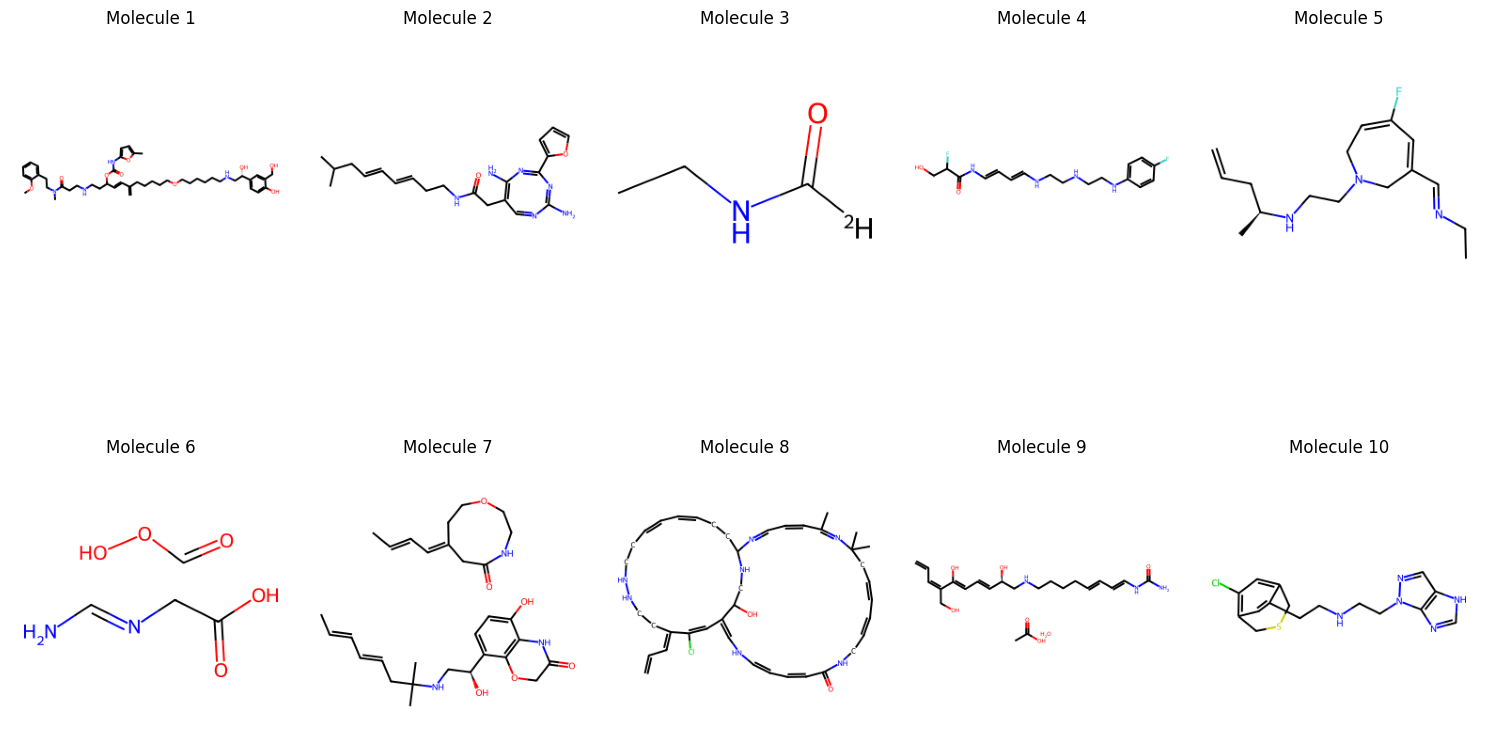

In [ ]:
import os
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt

# 생성된 분자 이미지 찾기
image_dir = 'gpcr_drug_design/results/'
molecule_images = sorted(glob.glob(f'{image_dir}molecule_*.png'))

print(f"발견된 분자 이미지: {len(molecule_images)}개")

# 이미지가 존재하는 경우 표시
if molecule_images:
    # 그리드로 표시 (Matplotlib 사용)
    plt.figure(figsize=(15, 10))

    for i, img_path in enumerate(molecule_images):
        plt.subplot(2, 5, i+1)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(f"Molecule {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("분자 이미지를 찾을 수 없습니다.")

    # SMILES 문자열에서 분자 직접 생성하여 표시
    print("대안: 생성된 SMILES 문자열에서 분자 구조 시각화")

    # CSV 파일이 있으면 로드
    csv_path = 'gpcr_drug_design/results/generated_molecules.csv'
    if os.path.exists(csv_path):
        import pandas as pd
        from rdkit import Chem
        from rdkit.Chem import Draw

        # SMILES 로드
        df = pd.read_csv(csv_path)

        if 'smiles' in df.columns:
            # 처음 10개 SMILES를 가져와 시각화
            smiles_list = df['smiles'].head(10).tolist()

            # 분자 객체 생성
            mols = [Chem.MolFromSmiles(s) for s in smiles_list]
            mols = [m for m in mols if m is not None]

            if mols:
                # 분자 속성 계산
                legends = []
                for mol in mols:
                    mw = Chem.Descriptors.MolWt(mol)
                    logp = Chem.Descriptors.MolLogP(mol)
                    legends.append(f"MW: {mw:.1f}, LogP: {logp:.1f}")

                # 그리드 이미지 생성
                img = Draw.MolsToGridImage(
                    mols,
                    molsPerRow=5,
                    subImgSize=(300, 300),
                    legends=legends
                )

                display(img)
            else:
                print("유효한 SMILES가 없습니다.")
        else:
            print("SMILES 열을 찾을 수 없습니다.")
    else:
        print("생성된 분자 CSV 파일을 찾을 수 없습니다.")

#5. 합성 가능성 평가 모델 구현


Loaded 100 generated molecules from CSV file
Calculating synthetic accessibility scores...


100%|██████████| 100/100 [00:00<00:00, 806.86it/s]

Processed 100 valid molecules

Synthetic Accessibility Analysis:
Mean SA Score: 5.02
Median SA Score: 5.11
Min SA Score: 2.34
Max SA Score: 7.72
Easily synthesizable molecules: 47 (47.0%)


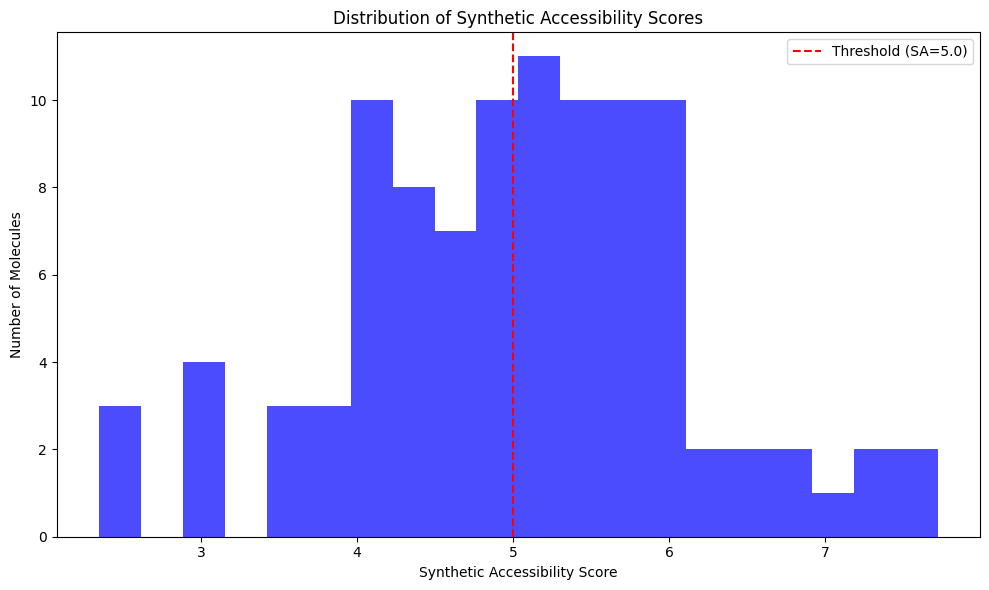

Results saved to /content/gpcr_drug_design/results/synthetic_accessibility_results.csv

Most easily synthesizable molecules:


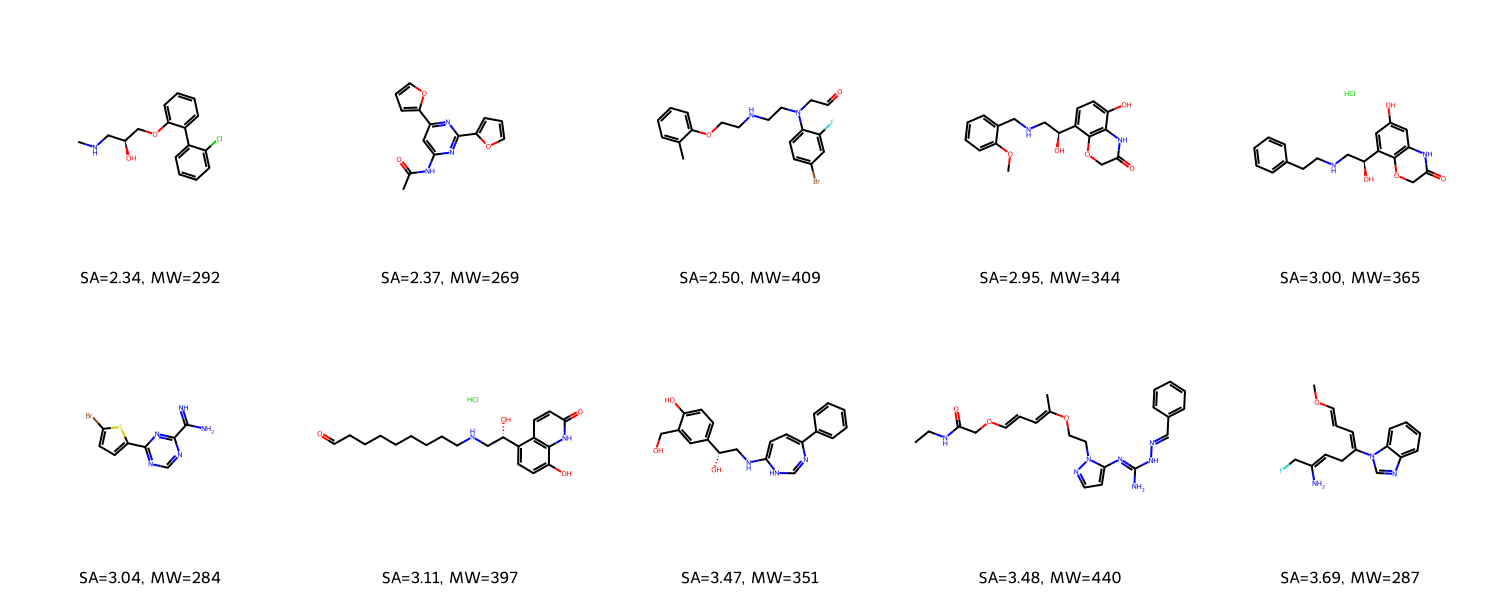


Most difficult to synthesize molecules:


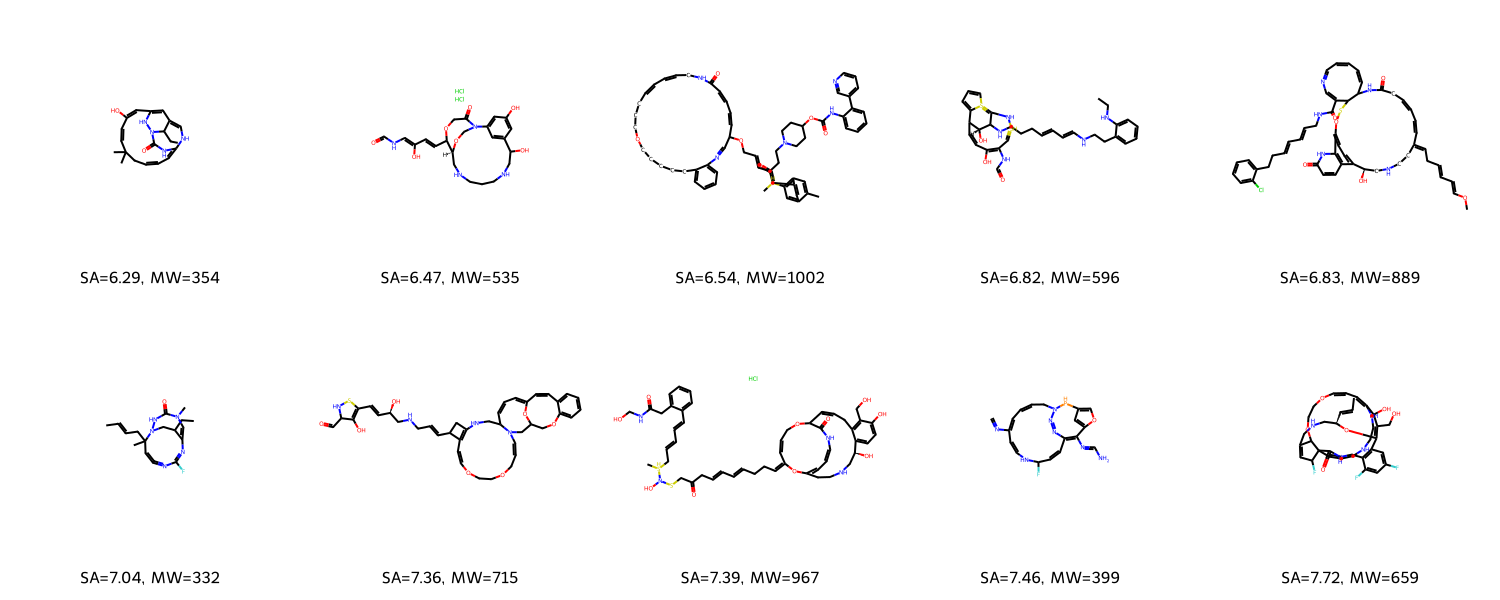

Analysis complete!


In [ ]:
# ===================================================================
# GPCR Target Drug Design Project - SA Score Calculator for Saved Compounds
# ===================================================================

# Install required packages
!pip install -q rdkit-pypi

import os
import sys
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDConfig
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

# Import SA_Score calculator
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

# Set up working directory
base_dir = '/content/gpcr_drug_design'
results_dir = f'{base_dir}/results'
os.makedirs(results_dir, exist_ok=True)

# 1. Load previously generated molecules
try:
    # Try to load from pickle file
    with open(f'{results_dir}/generated_molecules.pkl', 'rb') as f:
        generated_data = pickle.load(f)
        smiles_list = generated_data.get('smiles', [])
        print(f"Loaded {len(smiles_list)} generated molecules from pickle file")
except:
    # If pickle file doesn't exist, try CSV
    try:
        df = pd.read_csv(f'{results_dir}/generated_molecules.csv')
        if 'smiles' in df.columns:
            smiles_list = df['smiles'].tolist()
            print(f"Loaded {len(smiles_list)} generated molecules from CSV file")
        else:
            raise ValueError("No 'smiles' column found in CSV")
    except:
        # If both fail, use previous example data
        print("No saved molecules found, using example data")
        smiles_list = [
            'CCOc1ccc(CC(=O)N2CCN(c3ccccc3)CC2)cc1',
            'COc1ccc(CCN2CCN(c3ccccc3)CC2)cc1',
            'Fc1ccc(C2=NCCN2)cc1',
            'CN1CCN(c2ccc(F)cc2)CC1',
            'CCN1CCN(c2ccccc2)CC1',
            'COc1ccc(N2CCN(C(=O)c3ccco3)CC2)cc1',
            'CCN1CCN(c2ccc(Cl)cc2)CC1',
            'CCN1CCN(c2ccc(OC)cc2)CC1',
            'O=C(c1ccco1)N1CCN(c2ccccc2)CC1',
            'CN1CCN(c2ccc(Cl)cc2)CC1',
            'COc1ccc(N2CCN(C)CC2)cc1',
            'CN1CCN(c2ccc(OC)cc2)CC1',
            'O=C(c1ccc(F)cc1)N1CCN(c2ccccc2)CC1',
            'Clc1ccc(N2CCNCC2)cc1',
            'O=C(c1ccc(Cl)cc1)N1CCN(c2ccccc2)CC1'
        ]

# 2. Calculate SA scores for all molecules
print("Calculating synthetic accessibility scores...")
sa_results = []

for smiles in tqdm(smiles_list):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calculate SA score
            sa_score = sascorer.calculateScore(mol)

            # Calculate other drug-like properties
            mw = Chem.Descriptors.MolWt(mol)
            logp = Chem.Descriptors.MolLogP(mol)
            tpsa = Chem.Descriptors.TPSA(mol)
            hba = Chem.Descriptors.NumHAcceptors(mol)
            hbd = Chem.Descriptors.NumHDonors(mol)

            # Determine if molecule is easily synthesizable
            is_synthesizable = sa_score < 5.0

            sa_results.append({
                'smiles': smiles,
                'sa_score': sa_score,
                'mw': mw,
                'logp': logp,
                'tpsa': tpsa,
                'hba': hba,
                'hbd': hbd,
                'is_synthesizable': is_synthesizable
            })
    except Exception as e:
        print(f"Error processing {smiles}: {str(e)}")

# Create DataFrame with results
sa_df = pd.DataFrame(sa_results)
print(f"Processed {len(sa_df)} valid molecules")

# 3. Analyze results
if not sa_df.empty:
    # Calculate statistics
    mean_sa = sa_df['sa_score'].mean()
    median_sa = sa_df['sa_score'].median()
    min_sa = sa_df['sa_score'].min()
    max_sa = sa_df['sa_score'].max()
    synth_count = sa_df['is_synthesizable'].sum()
    synth_percent = synth_count / len(sa_df) * 100

    print("\nSynthetic Accessibility Analysis:")
    print(f"Mean SA Score: {mean_sa:.2f}")
    print(f"Median SA Score: {median_sa:.2f}")
    print(f"Min SA Score: {min_sa:.2f}")
    print(f"Max SA Score: {max_sa:.2f}")
    print(f"Easily synthesizable molecules: {synth_count} ({synth_percent:.1f}%)")

    # Plot SA score distribution
    plt.figure(figsize=(10, 6))
    plt.hist(sa_df['sa_score'], bins=20, alpha=0.7, color='blue')
    plt.axvline(x=5.0, color='red', linestyle='--', label='Threshold (SA=5.0)')
    plt.xlabel('Synthetic Accessibility Score')
    plt.ylabel('Number of Molecules')
    plt.title('Distribution of Synthetic Accessibility Scores')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Save results to CSV
    sa_df.to_csv(f'{results_dir}/synthetic_accessibility_results.csv', index=False)
    print(f"Results saved to {results_dir}/synthetic_accessibility_results.csv")

    # 4. Display molecules (without saving images)

    # Sort by SA score (ascending)
    sa_df_sorted = sa_df.sort_values('sa_score')

    # Display most easily synthesizable molecules
    easy_mols = []
    easy_legends = []
    for _, row in sa_df_sorted.head(10).iterrows():
        mol = Chem.MolFromSmiles(row['smiles'])
        if mol:
            easy_mols.append(mol)
            easy_legends.append(f"SA={row['sa_score']:.2f}, MW={row['mw']:.0f}")

    if easy_mols:
        print("\nMost easily synthesizable molecules:")
        img = Draw.MolsToGridImage(easy_mols, molsPerRow=5, subImgSize=(300, 300), legends=easy_legends)
        from IPython.display import display
        display(img)

    # Display most difficult to synthesize molecules
    difficult_mols = []
    difficult_legends = []
    for _, row in sa_df_sorted.tail(10).iterrows():
        mol = Chem.MolFromSmiles(row['smiles'])
        if mol:
            difficult_mols.append(mol)
            difficult_legends.append(f"SA={row['sa_score']:.2f}, MW={row['mw']:.0f}")

    if difficult_mols:
        print("\nMost difficult to synthesize molecules:")
        img = Draw.MolsToGridImage(difficult_mols, molsPerRow=5, subImgSize=(300, 300), legends=difficult_legends)
        display(img)
else:
    print("No valid molecules to analyze.")

print("Analysis complete!")